In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('KAG_energydata_complete_2.csv', sep=',')
df = df.drop('Unnamed: 0', axis = 1)
df = df.drop('date', axis = 1)
cols = df.columns
df.describe()

,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,HouseConsum
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,0.028194
std,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,0.028995
min,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.002778
25%,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,0.013889
50%,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,0.016667
75%,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,0.027778
max,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,0.308333


In [3]:
df[3:10].head(5)

,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,HouseConsum
3,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,0.025000
4,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,0.027778
5,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,0.025000
6,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,0.030556
7,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,0.030556


In [4]:
df_original = pd.read_csv('KAG_energydata_complete.csv', sep=',')
df_original['date'] = pd.to_datetime(df_original['date'])
df_original = df_original.drop(['rv1', 'rv2'], axis = 1)
cols_original = df_original.columns
df_original.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000


In [5]:
units = ['kW', 'kW', 'Degree_Celsius', '%', 'Degree_Celsius', '%', 'Degree_Celsius', '%', 'Degree_Celsius',
       '%', 'Degree_Celsius', '%', 'Degree_Celsius', '%', 'Degree_Celsius', '%', 'Degree_Celsius', '%', 'Degree_Celsius',
       '%', 'Degree_Celsius', 'Press_mm_hg', '%', 'm/s', 'km',
       'Degree_Celsius', 'kW']

In [6]:
title = ['Appliances', 'Lights', 'Temperature Kitchen', 'Humidity Kitchen', 'Temperature Living Room', 'Humidity Living Room', 'Temperature Laundry Room', 'Humidity Laundry Room', 'Temperature Office Room',
       'Humidity Office Room', 'Temperature Bathroom', 'Humidity Bathroom', 'Temperature Outside House', 'Humidity Outside House', 'Temperature Ironing Room', 'Humidity Ironing Room', 'Temperature Teenager Room', 'Humidity Teenager Room', 'Temperature Parents Room',
       'Humidity Parents Room', 'Temperature At Airport', 'Air Pressure At Airport', 'Humidity At Airport', 'Windspeed At Airport', 'Visibility At Airport',
       'Tdewpoint At Airport','House Consumption']

In [6]:
#CREATE A GRAPH OVER EACH FEATURE
plt.figure(figsize=(15,15))
i = 0
for x in cols_original:
    plt.plot(df_original['date'],df_original[x])
    plt.xticks(rotation='vertical')
    plt.xlabel('Date',fontsize=18, ha='center')
    plt.ylabel(units[i],fontsize=25, ha='center')
    plt.title(title[i],fontsize=25, ha='center')
    plt.tick_params(labelsize=18)
    plt.savefig('C:/Users/Anton/Desktop/Exjobb MSC/graph_ex/' + str(x) + '.PNG')
    plt.clf()
    i += 1

C:\Users\Anton\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<Figure size 1080x1080 with 0 Axes>

In [7]:

x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns = df.columns)
df.describe()

,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,HouseConsum
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,0.399089,0.609828,0.733558,0.288554,0.574321,0.468810,0.083179
std,0.170978,0.172080,0.196067,0.175087,0.181457,0.189803,0.094892
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.278671,0.503101,0.609649,0.142857,0.430769,0.339367,0.036364
50%,0.383173,0.623256,0.785088,0.261905,0.600000,0.453997,0.045455
75%,0.495445,0.735659,0.890351,0.392857,0.600000,0.595777,0.081818
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


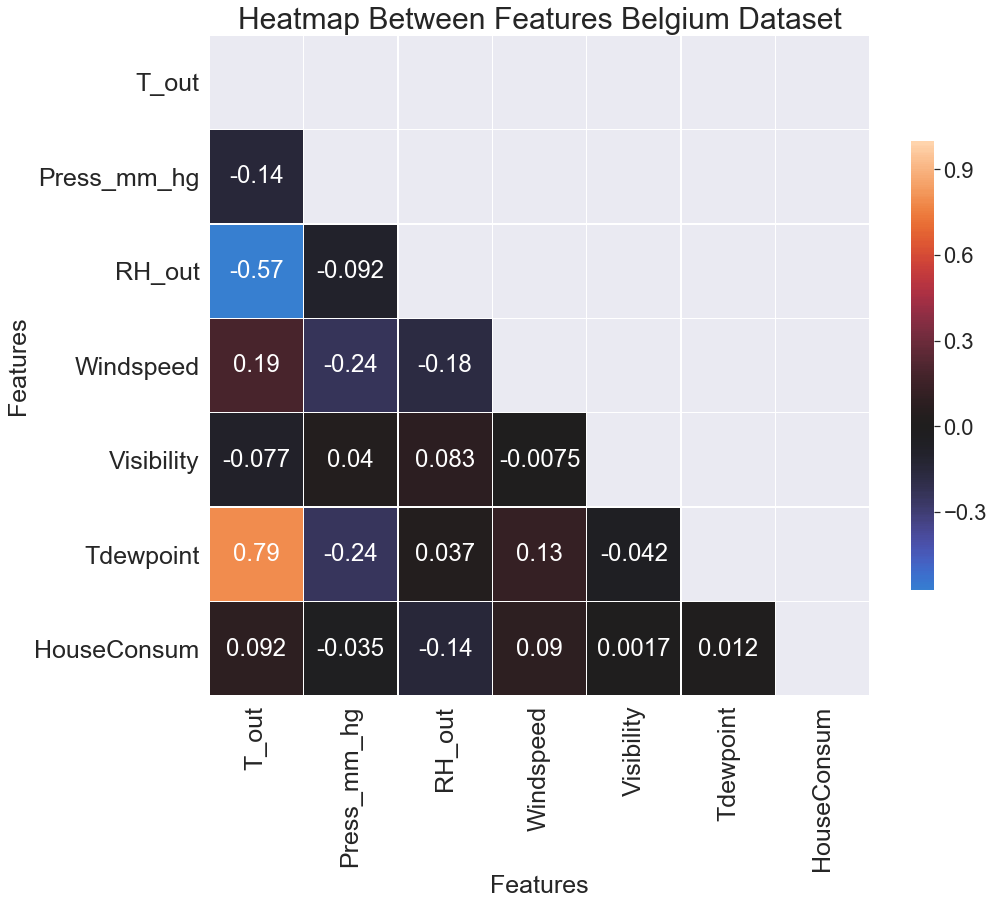

In [8]:
plt.figure(figsize=(15,15))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set(font_scale=2)
sns.heatmap(corr, mask=mask, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')
plt.xlabel('Features',fontsize=25, ha='center')
plt.ylabel('Features',fontsize=25, ha='center')
plt.title('Heatmap Between Features Belgium Dataset',fontsize=30, ha='center')
plt.tick_params(labelsize=25)
plt.ylim(7, 0)
plt.tight_layout()
plt.savefig('C:/Users/Anton/Desktop/Exjobb MSC/graph_ex/heatsel.PNG')

In [9]:
df2 = pd.read_csv('HomeC_3.csv', sep=',')
df2 = df2.drop('Unnamed: 0', axis =1)
cs = ['temperature', 'pressure', 'humidity', 'windSpeed', 'visibility', 'dewPoint', 'House overall [kW]']
df2 = df2[cs]

In [10]:
df2.describe()

,temperature,pressure,humidity,windSpeed,visibility,dewPoint,House overall [kW]
count,50391.000000,50391.000000,50391.000000,50391.000000,50391.000000,50391.000000,50391.000000
mean,10.412186,762.288910,0.664085,2.972787,5.749824,3.718896,0.858962
std,10.617192,5.921434,0.194233,1.776022,0.998889,10.603960,0.928474
min,-24.800000,739.860846,0.130000,0.000000,0.167770,-32.911111,0.000800
25%,2.094444,758.533632,0.510500,1.636390,5.853317,-4.117222,0.398141
50%,10.183333,762.460205,0.680000,2.646477,6.213712,3.905556,0.613882
75%,19.033333,766.173010,0.836000,3.992067,6.213712,12.661111,1.002376
max,34.288889,781.909304,0.980000,10.241686,6.213712,24.161111,11.224978


In [11]:
df2[3:10].head(5)

,temperature,pressure,humidity,windSpeed,visibility,dewPoint,House overall [kW]
3,2.30,762.745228,0.620,4.103827,6.213712,-4.222222,1.025522
4,2.30,762.745228,0.620,4.103827,6.213712,-4.222222,0.961780
5,2.27,762.646220,0.618,4.024254,6.213712,-4.277778,0.896597
6,2.15,762.250187,0.610,3.705962,6.213712,-4.500000,0.806652
7,2.15,762.250187,0.610,3.705962,6.213712,-4.500000,1.200333


In [12]:

x = df2.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df2 = pd.DataFrame(x_scaled, columns = df2.columns)
df2.describe()

,temperature,pressure,humidity,windSpeed,visibility,dewPoint,House overall [kW]
count,50391.000000,50391.000000,50391.000000,50391.000000,50391.000000,50391.000000,50391.000000
mean,0.595919,0.533386,0.628335,0.290263,0.923273,0.641818,0.076457
std,0.179682,0.140824,0.228509,0.173411,0.165216,0.185799,0.082721
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.455152,0.444078,0.447647,0.159777,0.940391,0.504517,0.035400
50%,0.592046,0.537460,0.647059,0.258402,1.000000,0.645089,0.054622
75%,0.741820,0.625758,0.830588,0.389786,1.000000,0.798501,0.089234
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


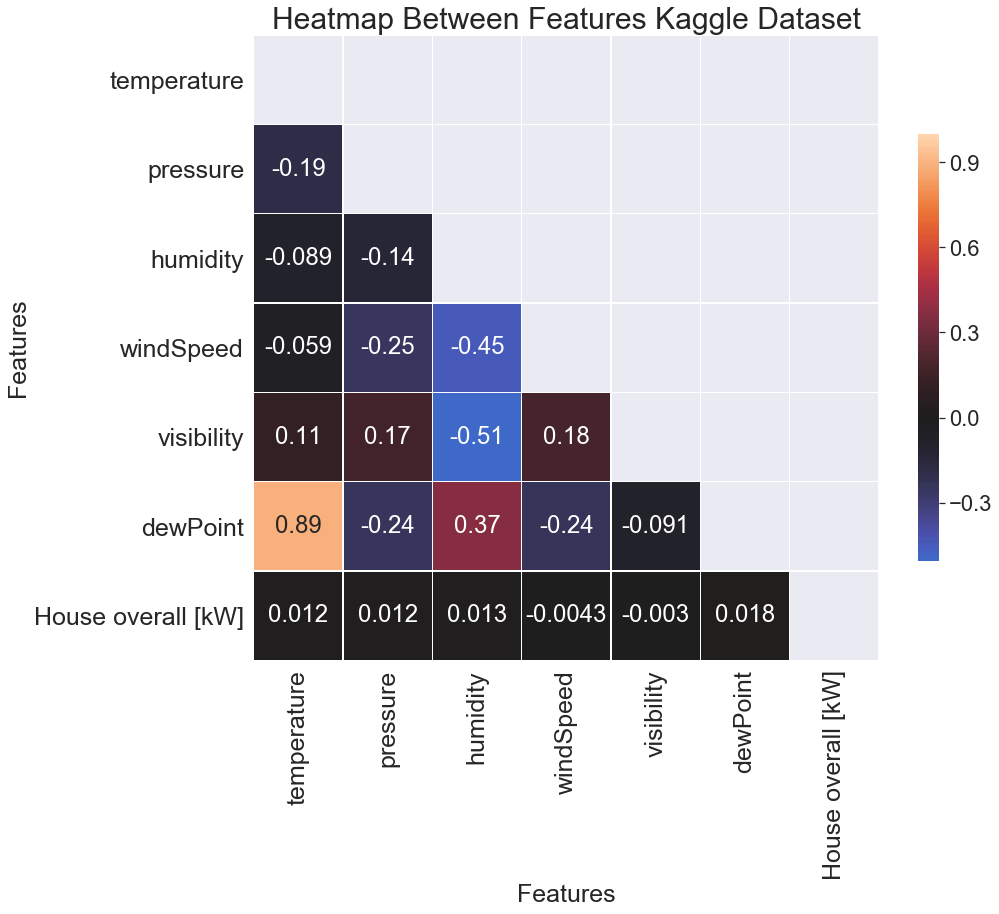

In [13]:
plt.figure(figsize=(15,15))
corr = df2.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set(font_scale=2)
sns.heatmap(corr, mask=mask, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')
plt.xlabel('Features',fontsize=25, ha='center')
plt.ylabel('Features',fontsize=25, ha='center')
plt.title('Heatmap Between Features Kaggle Dataset',fontsize=30, ha='center')
plt.tick_params(labelsize=25)
plt.ylim(7, 0)
plt.tight_layout()
plt.savefig('C:/Users/Anton/Desktop/Exjobb MSC/graph_ex/heatall_2.PNG')

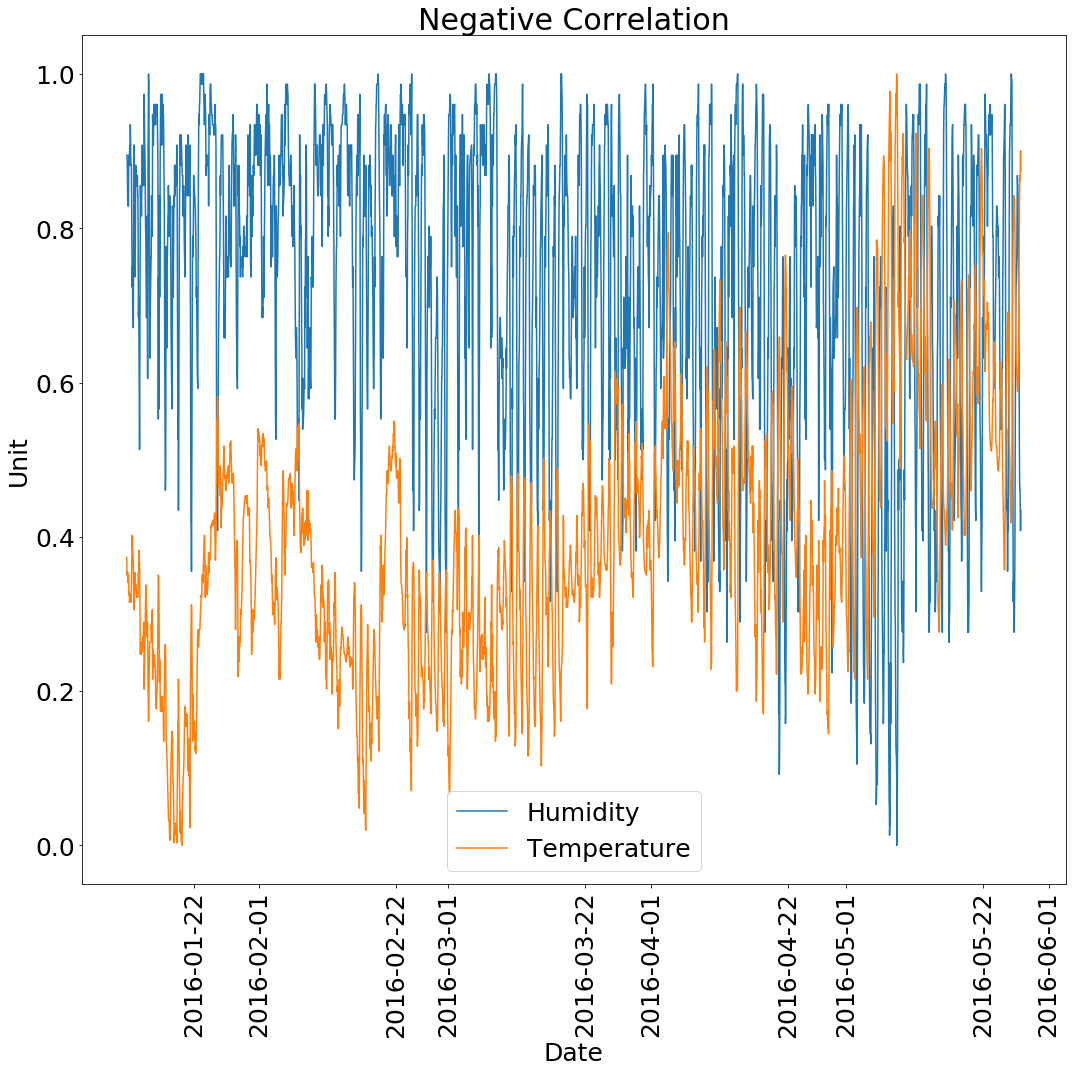

In [10]:
plt.figure(figsize=(15,15))
plt.plot(df_original['date'],df['RH_out'], label = 'Humidity')
plt.plot(df_original['date'],df['T_out'], label = 'Temperature')
plt.xticks(rotation='vertical')
plt.xlabel('Date',fontsize=25, ha='center')
plt.ylabel('Unit',fontsize=25, ha='center')
plt.title('Negative Correlation',fontsize=30, ha='center')
plt.tick_params(labelsize=25)
plt.legend(fontsize = 25)
plt.tight_layout()
plt.savefig('C:/Users/Anton/Desktop/Exjobb MSC/graph_ex/T_H' + '.PNG')

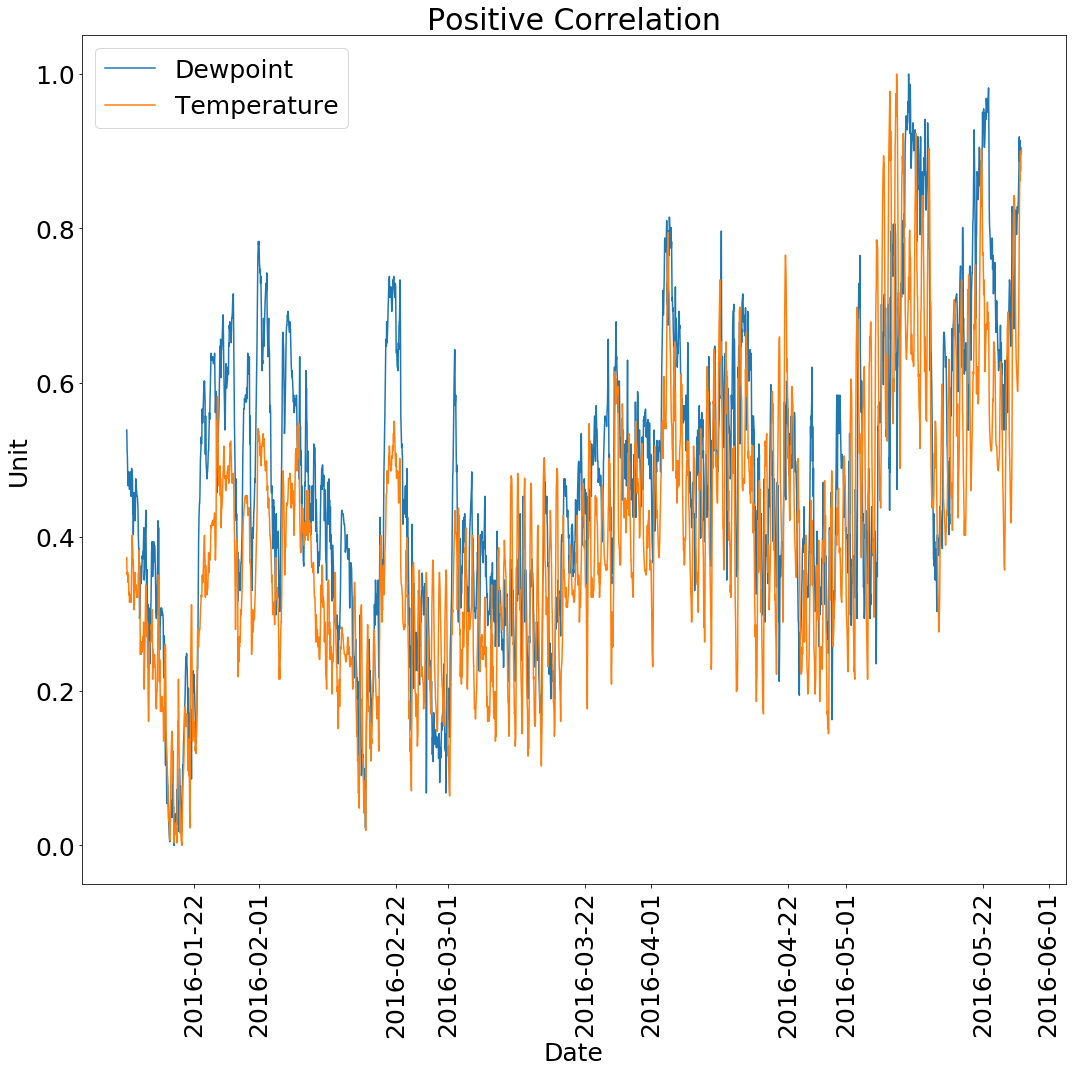

In [11]:
plt.figure(figsize=(15,15))
plt.plot(df_original['date'],df['Tdewpoint'], label = 'Dewpoint')
plt.plot(df_original['date'],df['T_out'], label = 'Temperature')
plt.xticks(rotation='vertical')
plt.xlabel('Date',fontsize=25, ha='center')
plt.ylabel('Unit',fontsize=25, ha='center')
plt.title('Positive Correlation',fontsize=30, ha='center')
plt.tick_params(labelsize=25)
plt.legend(fontsize = 25)
plt.tight_layout()
plt.savefig('C:/Users/Anton/Desktop/Exjobb MSC/graph_ex/T_D' + '.PNG')

In [14]:
cols_temp1 = ['T_out_1', 'pressure_1', 'humidity_1', 'windSpeed_1', 'visibility_1', 'dewPoint_1', 'HouseConsum_1']
cols_temp2 = ['T_out_2', 'pressure_2', 'humidity_2', 'windSpeed_2', 'visibility_2', 'dewPoint_2', 'HouseConsum_2']
sampled = df2.sample(n = 19735, axis = 0, random_state = 0)
df_both = pd.concat([df, sampled], axis=1)
new = cols_temp1+cols_temp2
df_both.columns = new
df_both.describe()

,T_out_1,pressure_1,humidity_1,windSpeed_1,visibility_1,dewPoint_1,HouseConsum_1,T_out_2,pressure_2,humidity_2,windSpeed_2,visibility_2,dewPoint_2,HouseConsum_2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,0.399089,0.609828,0.733558,0.288554,0.574321,0.468810,0.083179,0.597616,0.534587,0.625738,0.289385,0.925365,0.642505,0.075931
std,0.170978,0.172080,0.196067,0.175087,0.181457,0.189803,0.094892,0.180153,0.139456,0.228760,0.172153,0.162163,0.185576,0.080473
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002034,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.278671,0.503101,0.609649,0.142857,0.430769,0.339367,0.036364,0.456281,0.444524,0.447059,0.159319,0.941624,0.505500,0.035267
50%,0.383173,0.623256,0.785088,0.261905,0.600000,0.453997,0.045455,0.593042,0.538887,0.647059,0.257966,1.000000,0.645186,0.054685
75%,0.495445,0.735659,0.890351,0.392857,0.600000,0.595777,0.081818,0.745040,0.625758,0.823529,0.390223,1.000000,0.798316,0.089406
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.997381,1.000000,1.000000,1.000000


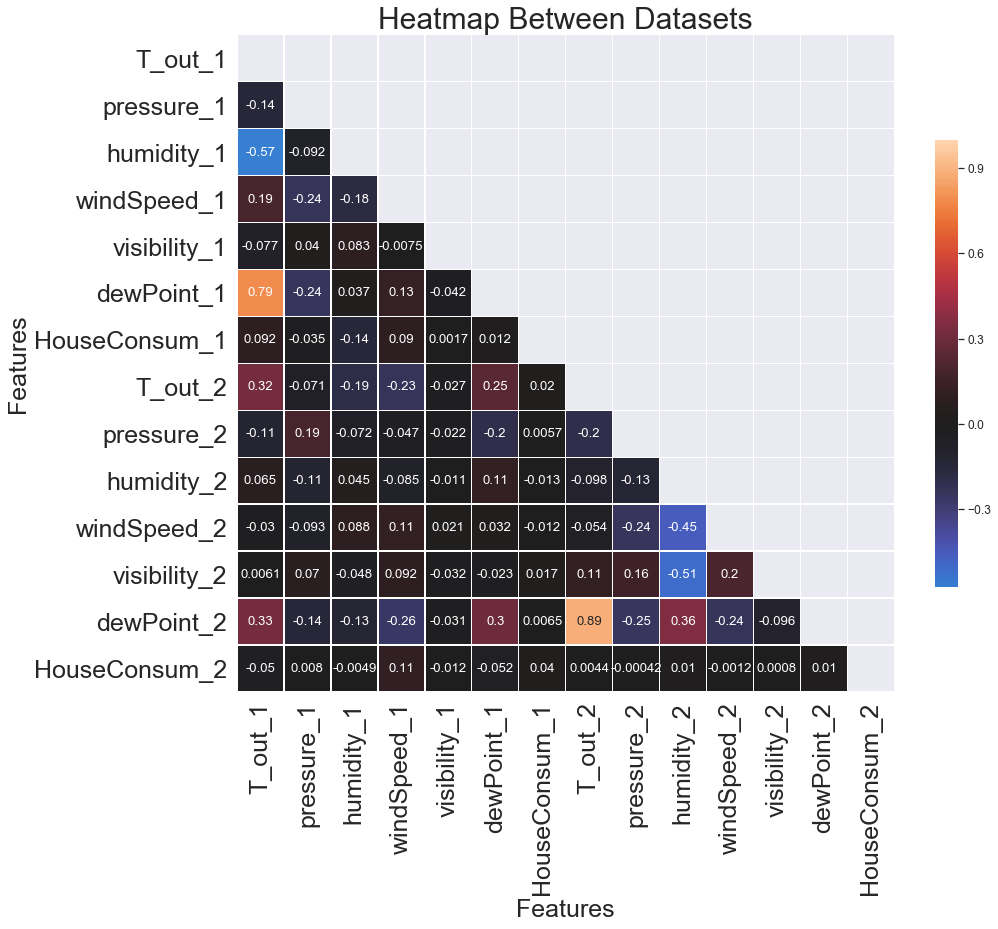

In [15]:
plt.figure(figsize=(15,15))
corr = df_both.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set(font_scale=1.1)
sns.heatmap(corr, mask=mask, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')
plt.xlabel('Features',fontsize=25, ha='center')
plt.ylabel('Features',fontsize=25, ha='center')
plt.title('Heatmap Between Datasets',fontsize=30, ha='center')
plt.tick_params(labelsize=25)
plt.ylim(14, 0)
plt.tight_layout()
plt.savefig('C:/Users/Anton/Desktop/Exjobb MSC/graph_ex/corrData_all.PNG')

In [4]:
def mae(true, pred):
    return np.mean(np.abs(true - pred))

In [5]:
def logcosh(true, pred):
    lista = []
    for i in range(0,len(true)):
        lista.append(np.mean(np.log(np.cosh((pred[i] - true[i])))))
    return lista

In [6]:
def mse(true, pred):
    return np.mean((true - pred)**2)

In [7]:
def rmse(true, pred):
    return np.sqrt(np.mean((pred-true)**2))

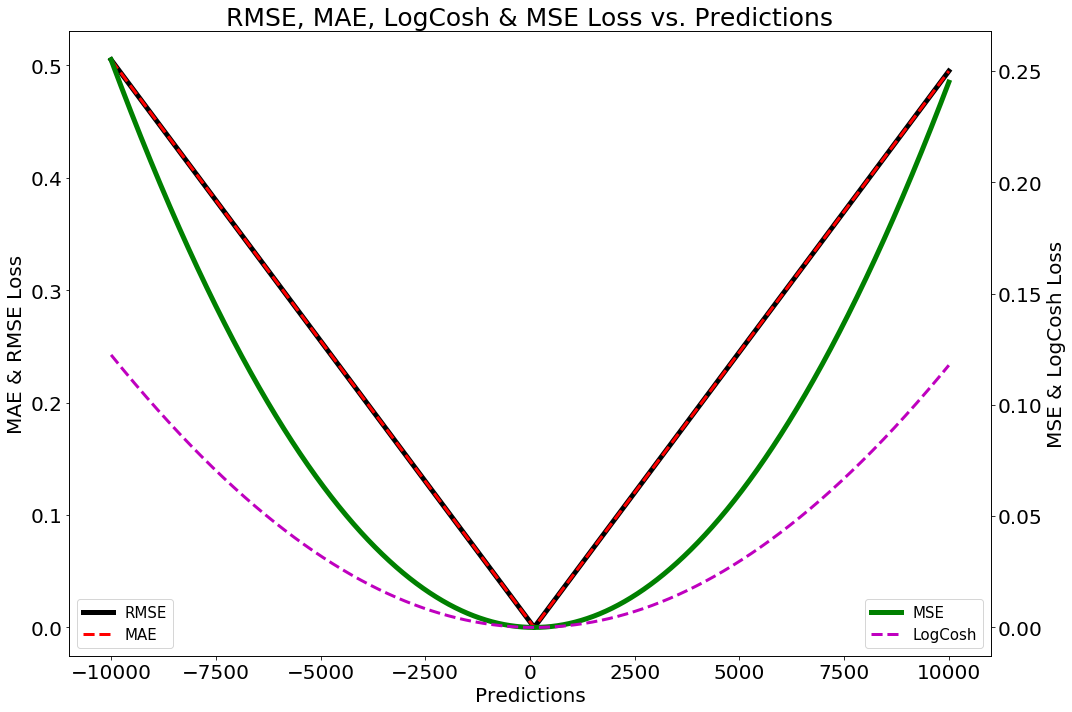

In [8]:
fig = plt.figure(figsize = (15,10))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

target = np.repeat(100, 20000) 
pred = np.arange(-10000,10000, 1)
x_axis = np.arange(-10000,10000, 1)

x = pred.reshape(-1, 1) #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
pred = min_max_scaler.fit_transform(x)

x = target.reshape(-1, 1) #returns a numpy array
target = min_max_scaler.transform(x)

loss_rmse = [rmse(target[i], pred[i]) for i in range(len(pred))]
ax1.plot(x_axis, loss_rmse, 'k-', linewidth=5)

loss_mae = [mae(target[i], pred[i]) for i in range(len(pred))]
ax1.plot(x_axis, loss_mae, 'r--', linewidth=3)

# array of same target value 10000 times
loss_mse = [mse(target[i], pred[i]) for i in range(len(pred))]
ax2.plot(x_axis, loss_mse, 'g-', linewidth=5)

loss_log = logcosh(target, pred)
ax2.plot(x_axis, loss_log, 'm--', linewidth=3)


# plot 


ax1.set_xlabel('Predictions', fontsize=20, ha='center')
ax1.set_ylabel('MAE & RMSE Loss', fontsize=20, ha='center')

ax2.set_ylabel('MSE & LogCosh Loss', fontsize=20, ha='center')
ax2.set_title("RMSE, MAE, LogCosh & MSE Loss vs. Predictions", fontsize=25, ha='center')

ax1.legend(['RMSE', 'MAE'], loc = 3, fontsize=15)
ax2.legend(['MSE', 'LogCosh'], loc = 4, fontsize=15)

ax1.tick_params(labelsize=20)
ax2.tick_params(labelsize=20)

plt.tight_layout()
plt.savefig('C:/Users/Anton/Desktop/Exjobb MSC/graph_ex/ALL_loss.PNG')

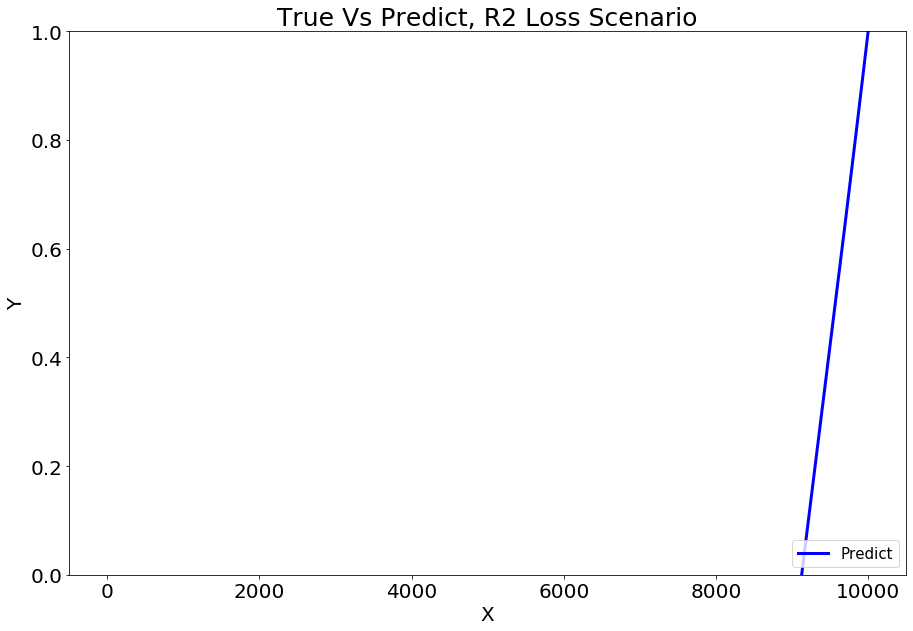

In [18]:
fig3 = plt.figure(figsize = (15,10))
ax4 = fig3.add_subplot(111)

temp = np.repeat(5, 10000)
target = np.repeat(5, 10000)
pred = np.arange(1,10001, 1)
tempx = pred

x = pred.reshape(-1, 1) #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
pred = min_max_scaler.fit_transform(x)

x = target.reshape(-1, 1) #returns a numpy array
target = min_max_scaler.transform(x)

x = temp.reshape(-1, 1) #returns a numpy array
temp = min_max_scaler.transform(x)

lista = []
for i in range(0,target.size):
    target[i] = pred[i]
    lista.append(r2_score(target, pred))

ax4.plot(tempx, lista, 'b-', linewidth=3)
#ax4.plot(tempx, temp, 'k-', linewidth=5)
#ax4.plot(tempx, pred, 'r-', linewidth=3)

ax4.set_xlabel('X', fontsize=20, ha='center')
ax4.set_ylabel('Y', fontsize=20, ha='center')
ax4.set_title("True Vs Predict, R2 Loss Scenario", fontsize=25, ha='center')

ax4.legend(['Predict', 'True'], loc = 4, fontsize=15)
ax4.tick_params(labelsize=20)
ax4.tick_params(labelsize=20)


plt.ylim(0,1)
plt.savefig('C:/Users/Anton/Desktop/Exjobb MSC/graph_ex/r2_scenario.PNG')